<a href="https://colab.research.google.com/github/AlessandraEsser78/lime_credito/blob/main/lime_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Nomes das colunas conforme a documentação
column_names = [
    'Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount', 'Savings',
    'EmploymentSince', 'InstallmentRate', 'PersonalStatusSex', 'OtherDebtors',
    'ResidenceSince', 'Property', 'Age', 'OtherInstallmentPlans', 'Housing',
    'NumberExistingCredits', 'Job', 'PeopleLiable', 'Telephone', 'ForeignWorker',
    'Class'
]

# Baixar o dataset diretamente da UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
df = pd.read_csv(url, sep=r'\s+', header=None, names=column_names)

# Mostrar as primeiras linhas
print("📊 Primeiras linhas do dataset:")
df.head()

📊 Primeiras linhas do dataset:


Status  Duration  CreditHistory  Purpose  CreditAmount  Savings  \
1 6  4 12       5         5              3        4             1       67   
2 48 2 60       1         3              2        2             1       22   
4 12 4 21       1         4              3        3             1       49   
1 42 2 79       1         4              3        4             2       45   
  24 3 49       1         3              3        4             4       53   

           EmploymentSince  InstallmentRate  PersonalStatusSex  OtherDebtors  \
1 6  4 12                3                2                  1             2   
2 48 2 60                3                1                  1             1   
4 12 4 21                3                1                  2             1   
1 42 2 79                3                1                  2             1   
  24 3 49                3                2                  2             1   

           ...  Property  Age  OtherInstallmentPlans  Housing  \
1 6  4 12  ...         0    0                      1        0   
2 48 2 60  ...         0    0                      1        0   
4 12 4 21  ...         0    0                      1        0   
1 42 2 79  ...         0    0                      0        0   
  24 3 49  ...         1    0                      1        0   

           NumberExistingCredits  Job  PeopleLiable  Telephone  ForeignWorker  \
1 6  4 12                      0    1             0          0              1   
2 48 2 60                      0    1             0          0              1   
4 12 4 21                      0    1             0          1              0   
1 42 2 79                      0    0             0          0              1   
  24 3 49                      0    0             0          0              1   

           Class  
1 6  4 12      1  
2 48 2 60      2  
4 12 4 21      1  
1 42 2 79      1  
  24 3 49      2  

[5 rows x 21 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separar features e target
X = df.drop('Class', axis=1)
y = df['Class']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliar
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Acurácia do modelo: {accuracy:.2f}")


✅ Acurácia do modelo: 0.69



🔍 Explicando a previsão para o cliente 5:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


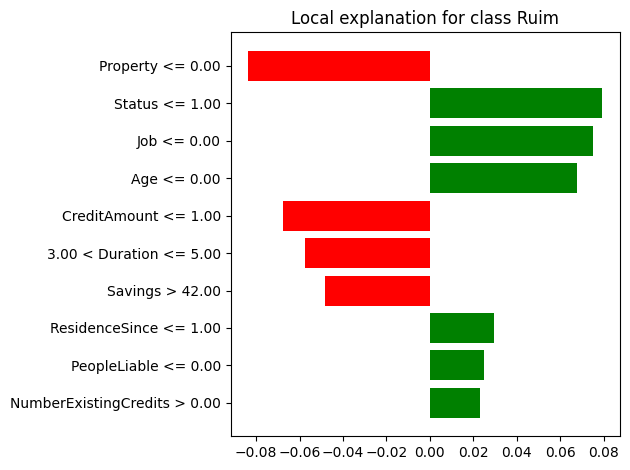

In [ ]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Criar explicador LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns.tolist(),
    class_names=['Bom', 'Ruim'],
    mode='classification'
)

# Escolher um cliente para explicar
i = 5
print(f"\n🔍 Explicando a previsão para o cliente {i}:")

# Gerar explicação
exp = explainer.explain_instance(
    data_row=X_test.values[i],
    predict_fn=model.predict_proba,
    num_features=10
)

# Mostrar gráfico
fig = exp.as_pyplot_figure()
plt.tight_layout()
plt.show()